<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-to-compute-the-&quot;density-recovery-profile&quot;-of-a-set-of-locations" data-toc-modified-id="How-to-compute-the-&quot;density-recovery-profile&quot;-of-a-set-of-locations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to compute the "density recovery profile" of a set of locations</a></span><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Examples" data-toc-modified-id="Examples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Examples</a></span><ul class="toc-item"><li><span><a href="#On-and-Off-Alpha-cells-in-cat-retina-(Wässle-1981)" data-toc-modified-id="On-and-Off-Alpha-cells-in-cat-retina-(Wässle-1981)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>On and Off Alpha cells in cat retina (Wässle 1981)</a></span></li><li><span><a href="#Cones-in-chicken-retina-(Kram-2020)" data-toc-modified-id="Cones-in-chicken-retina-(Kram-2020)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cones in chicken retina (Kram 2020)</a></span></li><li><span><a href="#Ganglion-cells-of-type-W3-in-mouse-retina-(Zhang-2012)" data-toc-modified-id="Ganglion-cells-of-type-W3-in-mouse-retina-(Zhang-2012)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Ganglion cells of type W3 in mouse retina (Zhang 2012)</a></span></li></ul></li></ul></li><li><span><a href="#The-DRP-in-a-finite-observation-window" data-toc-modified-id="The-DRP-in-a-finite-observation-window-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The DRP in a finite observation window</a></span><ul class="toc-item"><li><span><a href="#Theory-for-a-rectangular-window" data-toc-modified-id="Theory-for-a-rectangular-window-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Theory for a rectangular window</a></span></li><li><span><a href="#Analysis-routines-for-a-rectangular-window" data-toc-modified-id="Analysis-routines-for-a-rectangular-window-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis routines for a rectangular window</a></span><ul class="toc-item"><li><span><a href="#Load-the-data-from-Wässle-1981-and-histogram-the-pairwise-distances-between-cells" data-toc-modified-id="Load-the-data-from-Wässle-1981-and-histogram-the-pairwise-distances-between-cells-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Load the data from Wässle 1981 and histogram the pairwise distances between cells</a></span></li><li><span><a href="#Compute-the-cell-density-by-normalizing-to-the-available-area" data-toc-modified-id="Compute-the-cell-density-by-normalizing-to-the-available-area-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Compute the cell density by normalizing to the available area</a></span></li><li><span><a href="#Add-error-bars" data-toc-modified-id="Add-error-bars-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Add error bars</a></span></li><li><span><a href="#Combining-everything" data-toc-modified-id="Combining-everything-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Combining everything</a></span></li></ul></li><li><span><a href="#Non-rectangular-windows" data-toc-modified-id="Non-rectangular-windows-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Non-rectangular windows</a></span><ul class="toc-item"><li><span><a href="#Right-triangle-shape" data-toc-modified-id="Right-triangle-shape-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Right triangle shape</a></span></li><li><span><a href="#Arbitrary-polygon-shape" data-toc-modified-id="Arbitrary-polygon-shape-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Arbitrary polygon shape</a></span></li></ul></li></ul></li><li><span><a href="#A-model-of-cells-on-a-lattice" data-toc-modified-id="A-model-of-cells-on-a-lattice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A model of cells on a lattice</a></span><ul class="toc-item"><li><span><a href="#Contribution-from-one-cell" data-toc-modified-id="Contribution-from-one-cell-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Contribution from one cell</a></span></li><li><span><a href="#All-cells" data-toc-modified-id="All-cells-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>All cells</a></span></li><li><span><a href="#Simulation-of-cells-on-a-jittered-lattice" data-toc-modified-id="Simulation-of-cells-on-a-jittered-lattice-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Simulation of cells on a jittered lattice</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# How to compute the "density recovery profile" of a set of locations

## Purpose
The goal is to test whether a population of neuronal cell bodies are spaced at regular distances from each other. The starting data are the $(x,y)$ points of cell bodies in a plane restricted to an observation window $W$. The null hypothesis is that all the points are statistically independent, like raindrops falling onto the surface $W$. 

A convenient test for this null hypothesis is the spatial autocorrelation function of the set of locations. This is the density of cells as a function of the displacement vector from any other cell. If one averages this over all directions of the displacement vector it becomes the density of cells as a function of distance from any other cell. This function is often called the "density recovery profile" (e.g. Rodieck 1991).

This notebook is about the practicalities of computing the density recovery profile. Most of the mental effort goes into dealing with edge effects that come from observing a finite window. Correcting for the shape of that window allows you to use the available data most efficiently.

The last part adds a parametric model for a regular set of locatons that can be useful for fitting a DRP.

## Examples

### On and Off Alpha cells in cat retina (Wässle 1981)
One of the first clear statements about regular tiling in the retina.

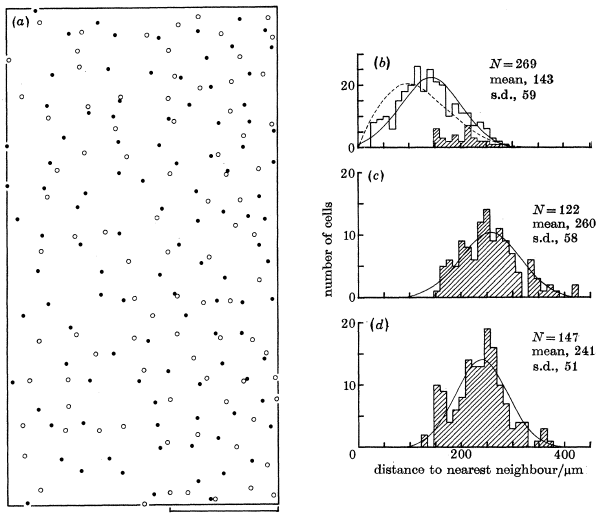

Mosaic of alpha cells in the cat retina. The map in (a) shows the distribution of on- (open circles) and off-alpha cells (filled circles) at 4.5 mm retinal eccentricity (scale bar, mm) The histograms (b), (c) and (d) show the nearest neighbour analysis of a larger area including the field in (a): (b) for all cells mixed; (c) for on-cells only; (d) for off-cells only.

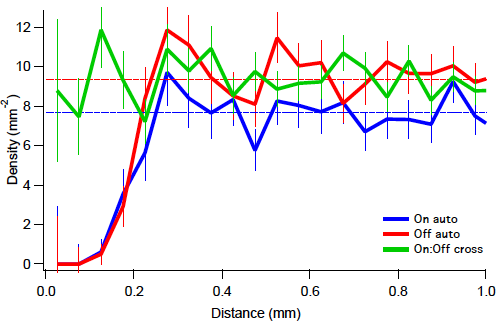

I digitized the data in (a) above and computed the spatial autocorrelation function of the ON (solid blue line) and OFF (red) cell locations, normalized as the probability per unit area of finding a cell at a given distance from another cell of the same type. Note the prominent hole for distances < 0.2 mm. Cross-correlation (green) shows the probability of finding an OFF cell at a given distance from an ON cell. Note there is no dependence on distance across cell types. Dotted lines are the average densities of ON (blue) and OFF (red) cells in this patch. See Roska & Meister 2014.

### Cones in chicken retina (Kram 2020)

Here is an extreme example of regular cell spacing from chicken cone photoreceptors (Kram 2020). One can distinguish 5 different cone types in light microscopy based on their oil droplets. They are all intermingled, but within a given type cells tend to keep a regular distance from each other. 
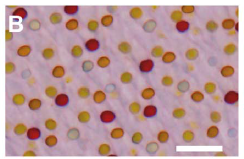
(B) Brightfield view of a flatmounted P15 chicken retina viewed photoreceptor side up. Size bar = 10 $\mu$m.

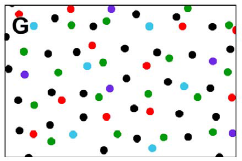
(G) Digitized versions of the field shown in (B). Colored dots correspond to their respective single cone types. Black dots represent double cones.

Focusing now on just one type, here are the locations (A), the auto-correlation of that set of locations (B), and the density recovery profile (C). The hole in the DRP at short distances shows a rigorous exclusion zone of 5 um or so around any one cone of this type. The nearest neighbor is most likely at 9 um distance. But the spacing is so regular that there are multiple peaks and valleys in the DRP (C) corresponding to second and third nearest neighbors etc. These "shells" can be seen even in the auto-correlation (B) before averaging over angles.

The authors also show that there is little to no interaction between the cone types.

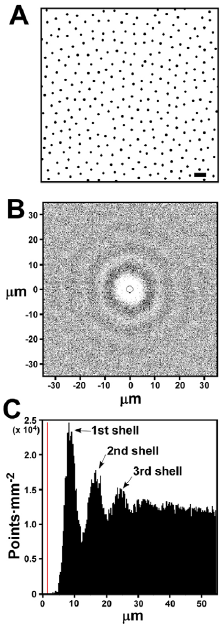
(A) Digitized image of double cone distribution in a portion of a single field. Size bar = 10 $\mu$m. 

(B) Spatial autocorrelogram for entire field of double cones of which a portion is shown in (A). The circle around the origin indicates the diameter of an average double cone oil droplet. 

(C) Density recovery profile derived from the spatial autocorrelogram in (B). The peaks designated ‘‘1st shell’’ etc. are explained in the main text. The vertical orange line indicates the average diameter of a double cone oil droplet.

### Ganglion cells of type W3 in mouse retina (Zhang 2012)

Here is a more commonplace example with less extreme regularity from Zhang 2012. We are looking at the density recovery profile for the population of W3 ganglion cells in mouse retina. Again there is a hole at short distances, indicating some regularity of spacing, but with less than perfect exclusion. At larger distances there is again a bit of overshoot and perhaps a few oscillations, though less obvious than for the cone example above. 

In this example we also computed the expected DRP from a concrete model of the locations: The assumption is that the cells are placed on a hexagonal grid with some random jitter about the grid locations. In addition only some fraction of the population is actually observed because of incomplete genetic labeling. The 3 parameters (spacing, jitter, fraction) are adjusted to fit the data.

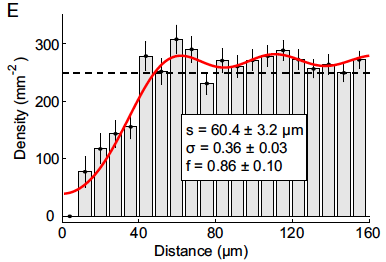

Density recovery profile of the distribution of W3 cells in a 1.2 × 1.2-mm region in the central retina (histogram, error bars = SEM). Note the prominent repulsion at short distances. Dashed line: expected profile if the cells were randomly distributed. Red line: fit with a model assuming that cells are placed on a close-packed hexagonal array with spacing $s$ and a positional jitter $\sigma$ (expressed in units of $s$) and that only a fraction $f$ of them are labeled. (Inset) The best-fit parameters and their 95% confidence intervals.

# The DRP in a finite observation window
The density recovery profile plots the probability per unit area of finding a cell as a function of distance from a cell of the same type. 

One starts by measuring for each reference cell in the window the distances to all of the other cells and histogramming those, which yields

$$N\left( r \right) \textrm{d} r = {\text{average number of cells at radii between }}r{\text{ and }}r + \textrm{d} r {\text{ from an arbitrary reference cell}}$$

If the window were infinitely large, we could now simply divide this by the area of the annulus between $r$ and $r + \textrm{d} r$, and get the density function 

$$D\left( r \right) \approx \frac{{N\left( r \right) \textrm{d} r}}{{2\pi r \textrm{d} r}} = \frac{{N\left( r \right)}}{{2\pi r}}$$

But for a finite window this isn't correct: At large distances the available area is only a fraction of the full annulus. And for distances greater than the diagonal of the window there is no available area at all. Therefore the proper normalization is 

\begin{align}
  D\left( r \right) & = \frac{{{\text{average number of cells in window at distance between }}r{\text{ and }}r + \textrm{d} r{\text{ from a reference cell}}}}{{{\text{average area in window at distance between }}r{\text{ and }}r + \textrm{d} r{\text{ from a reference cell}}}} \\ 
   & = \frac{{N\left( r \right) \textrm{d} r}}{{A\left( r \right) \textrm{d} r}} \\ 
\end{align} 

If the cells are distributed evenly within the window (e.g. there is no obvious gradient of density), then the denominator can be approximated as

$$A\left( r \right) \textrm{d} r = {\text{average area in window at distance between }}r{\text{ and }}r +  \textrm{d} r{\text{ from any reference point in the window}}$$

Note that $A\left( r \right)$ must integrate to the full area of the window, $W$:

$$\int\limits_0^\infty  {A\left( r \right){\text{d}}r}  = W = h \cdot w$$

and is simply related to the probability density of distances between points:

\begin{align}
  A\left( r \right) & = W \cdot P\left( r \right) \\ 
  P\left( r \right) \textrm{d} r & = {\text{probability that two points in the window have distance between }}r{\text{ and }}r +  \textrm{d} r \\ 
\end{align}

So finally

$$D\left( r \right) = \frac{{N\left( r \right)}}{{W \cdot P\left( r \right)}}$$


## Theory for a rectangular window
Here we compute the probability density $P\left( r \right)$ of the pairwise distance $r$ between two arbitrary points in a rectangular window of width $w$ and height $h$, with $h<w$.



Pick two points in the window at random. What is the probability distribution of their distance $r$? The trick is to first compute the probability distribution of the square of the distance

$${r^2} = {x^2} + {y^2}$$
	 	
where $x$ and $y$ are the separation of the two points along the two coordinates. This has two advantages:
1.	The distribution of ${r^2}$ is the convolution of the distributions of $x^2$ and of $y^2$.  and  
2.	$x^2$ and $y^2$ are distributed independently of each other.

In particular,

\begin{align}
  {P_{{x^2}}}\left( {{x^2}} \right) &= \frac{1}{h}\left( {\frac{1}{x} - \frac{1}{h}} \right) \hfill \\
  {P_{{y^2}}}\left( {{y^2}} \right) &= \frac{1}{w}\left( {\frac{1}{y} - \frac{1}{w}} \right) \hfill \\ 
\end{align}

From this one finds 

\begin{align}
  {P_{{r^2}}}\left( {{r^2}} \right) &= \frac{1}{{hw}}\left[ {2\arcsin t - 2\frac{r}{h}t + 2\frac{r}{w}\sqrt {1 - {t^2}}  + \frac{{{r^2}}}{{hw}}{t^2}} \right]_{{t_ - }}^{{t_ + }} \hfill \\
  {\text{with the following limits:}} \hfill \\
  r < h:\quad {t_ - } &= 0,\quad {t_ + } = 1 \hfill \\
  h < r < w:\quad {t_ - } &= \sqrt {1 - {{\left( {\frac{h}{r}} \right)}^2}} ,\quad {t_ + } = 1 \hfill \\
  w < r:\quad {t_ - } &= \sqrt {1 - {{\left( {\frac{h}{r}} \right)}^2}} ,\quad {t_ + } = \frac{w}{r} \hfill \\ 
\end{align} 

Finally one gets the distribution of the distance itself:

\begin{align}
  {P}\left( r \right) &= 2r \cdot {P_{{r^2}}}\left( {{r^2}} \right) \\ 
   &= \frac{{2r}}{{hw}}\left\{ {\begin{array}{*{20}{l}}
  {\pi  - 2r\left( {\frac{1}{h} + \frac{1}{w}} \right) + \frac{{{r^2}}}{{hw}}}&{,\;{\text{if }}r < h} \\ 
  {2\arcsin \left( {\frac{h}{r}} \right) - 2\frac{r}{h} + 2\sqrt {{{\left( {\frac{r}{h}} \right)}^2} - 1}  - \frac{h}{w}}&{,\;{\text{if }}h < r < w} \\ 
  \begin{gathered}
  2\arcsin \left( {\frac{h}{r}} \right) + 2\arcsin \left( {\frac{w}{r}} \right) - \pi  - \frac{h}{w} - \frac{w}{h} +  \hfill \\
   + 2\sqrt {{{\left( {\frac{r}{h}} \right)}^2} - 1}  + 2\sqrt {{{\left( {\frac{r}{w}} \right)}^2} - 1}  - \frac{{{r^2}}}{{hw}} \hfill \\ 
\end{gathered} &{,\;{\text{if }}w < r} 
\end{array}} \right. \\ 
\end{align} 

Sanity check: Note at short distances this becomes

$$P\left( r \right)\xrightarrow[{r \to 0}]{}\frac{{2\pi r}}{{hw}}$$

so that

$$D\left( r \right)\xrightarrow[{r \to 0}]{}\frac{{N\left( r \right)}}{{2\pi r}}$$

as expected.

## Analysis routines for a rectangular window

In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import path
from scipy.optimize import curve_fit

import sys
module_path = '/Users/markus/Work/Projects/Python' 
if module_path not in sys.path:
    sys.path.append(module_path)
from MM_Plot_Utils import plot, hist # using version in my Python directory

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Load the data from Wässle 1981 and histogram the pairwise distances between cells

In [2]:
# Load data from Wässle 1981
pOn = np.genfromtxt('Wassle_1981_Data.csv', delimiter=',',skip_header=1,usecols=(0,1))
i=np.where(np.isnan(pOn[:,0]))[0][0] # find row of first Nan
pOn=pOn[:i] # remove the Nans
pOf = np.genfromtxt('Wassle_1981_Data.csv', delimiter=',',skip_header=1,usecols=(2,3))
w=2.5 # width of window in mm
h=4.5698 # height of window in mm

This function will histogram the $\frac{n(n-1)}{2}$ pairwise distances at a specified bin width $\textrm{d}r$ for the radius. It produces $N(r)$ from the above treatment:

In [3]:
# Histogram pairwise distances
def Histo_Dist(pts,dr):
    '''
    Histograms all pairwise distances among the points in pts, with bin size dr.
    Note there are a total of n*(n-1)/2 values with n=len(pts)
    '''
    di=np.array([pts[i]-pts[j] for i in range(len(pts)-1) for j in range(i+1,len(pts))]) # all pairwise differences
    d=np.linalg.norm(di,axis=-1) # all pairwise distances
    m=int(np.ceil(np.max(d)/dr)) # number of distance bins + 1
    bins=dr*np.arange(m) # bin boundaries
    r=(bins[:-1]+bins[1:])/2 # bin centers
    N=np.histogram(d,bins=bins)[0] # number of pairwise distances per reference cell in each radius bin
    N=N/(len(pts)/2)/dr # normalize to one reference cell and per unit radius
    return r,N

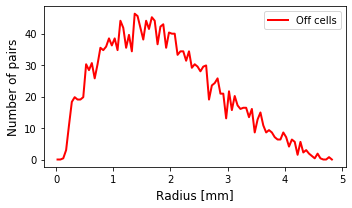

In [12]:
# Histogram pairwise distances of the Off cells
dr=0.05
rOf,hOf=Histo_Dist(pOf,dr)
plot(rOf,hOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Number of pairs',legend=['Off cells']);

This doesn't look terribly useful. There are few short distances and few long distances and many in the middle. That's as expected: At short distances there just isn't a lot of area in an annulus of radius $r$ and width $\textrm{d}r$. For large distances $r$, most of the annulus falls outside of the rectangular observation window, so again there are fewer pairs. We would like to plot the density of cells per unit area in all these cases. So obviously we need to normalize the result at each radius for the amount of area available in an annulus of that radius.

### Compute the cell density by normalizing to the available area 

This function computes the "area density" as a function of radius, namely the $A(r)$ in the above treatment. Recall that $A(r)\textrm{d}r$ is the area inside the rectangular window for an annulus of radius $r$ and thickness $\textrm{d}r$ around an average point in the window:

In [5]:
# The area density for a rectangular window
def Area_Dist(r,w,h):
    '''
    Computes d(Area)/d(Radius) as a function of Radius from an average point in 
    a rectangular window of dimensions w x h.
    '''
    if w<h: # if width < height swap the two
        w,h=h,w
    if r<h:
        q=np.pi-2*r*(1/h+1/w)+r**2/h/w
    elif r<w:
        q=2*np.arcsin(h/r)-2*r/h+2*np.sqrt((r/h)**2-1)-h/w
    else:
        q=(2*np.arcsin(h/r)+2*np.arcsin(w/r)-np.pi-h/w-w/h+
           2*np.sqrt((r/h)**2-1)+2*np.sqrt((r/w)**2-1)-r**2/h/w)
    return 2*r*q

In [6]:
aOf=np.array([Area_Dist(r,w,h) for r in rOf])

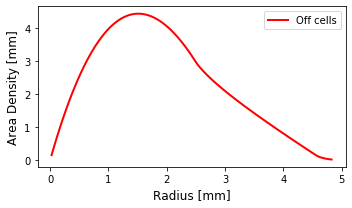

In [7]:
plot(rOf,aOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Area Density [mm]',legend=['Off cells']);

This behaves as expected. At small radius the area density is approximately $2 \pi r$. At large radii it drops off quickly. And obviously it goes to zero when the radius equals the diagonal of the window.

Now we normalize the counts of pairwise distances by the available area:

In [13]:
# Normalize the histograms
dOf=hOf/aOf # divide by the area available for that radius bin

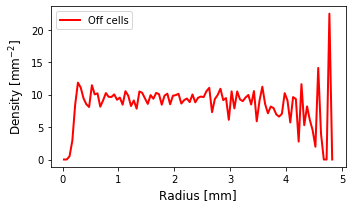

In [14]:
plot(rOf,dOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['Off cells']);

Now we can see the important features in the data: At short distances there is a gap, then the density rises quickly, overshoots a little and then stays constant over a wide range of radius. At large radius the data seem to go haywire. That's because there are very few pairs there and so the density estimate has a lot of uncertainty. Obviously we should post some error bars...

### Add error bars

For a simple approach one can treat the original counts of pairwise distances like any other histogram count. Then the uncertainty is equal to the square root of the count:

In [15]:
nOf=len(pOf) # number of cells, need this to reconstruct the histogram count
eOf=np.sqrt(hOf/(nOf/2)/dr)/aOf # sqrt of the histogram count

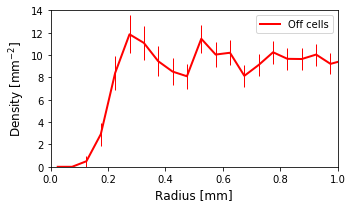

In [16]:
ax=plot(rOf,dOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['Off cells'],
     xlim=[0,1],ylim=[0,14]);
ax.errorbar(rOf,dOf,eOf,fmt='none',ecolor='red',elinewidth=1);

These error bars suggest that some of the overshoot and oscillation is significant

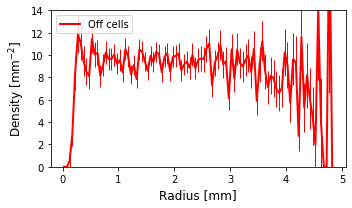

In [17]:
ax=plot(rOf,dOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['Off cells'],
     ylim=[0,14]);
ax.errorbar(rOf,dOf,eOf,fmt='none',ecolor='red',elinewidth=1);

As expected the uncertainty increases at large distances that approach the size of the window. 

There is probably a more appropriate treatment of uncertainty here. It is suspicious that there really are only $2n$ data points, namely the x- and y-coordinates of $n$ cells, and yet we are accumulating $\frac{n(n-1)}{2}$ values in the histogram. My guess is that the error is underestimated.

### Combining everything

In [18]:
# Analyze pairwise distances on a rectangular window
def Analyze_Dist(pts,dr,w,h):
    '''
    Analyzes pairwise distances among the points in pts, with bin size dr,
    observed in a rectangular window of dimensions w x h.
    '''
    r,N=Histo_Dist(pts,dr)
    A=np.array([Area_Dist(x,w,h) for x in r])
    D=N/A
    E=np.sqrt(N/(len(pts)/2)/dr)/A
    return r,D,E # radius, density, uncertainty

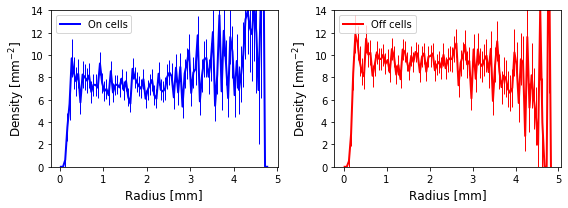

In [19]:
# Plot results for both On and Off cells
rOn,DOn,EOn=Analyze_Dist(pOn,dr,w,h)
rOf,DOf,EOf=Analyze_Dist(pOf,dr,w,h)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,3))
plot(rOn,DOn,fmts=['b-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['On cells'],
     ylim=[0,14],axes=ax[0]);
ax[0].errorbar(rOn,DOn,EOn,fmt='none',ecolor='blue',elinewidth=1);
plot(rOf,DOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['Off cells'],
     ylim=[0,14],axes=ax[1]);
ax[1].errorbar(rOf,DOf,EOf,fmt='none',ecolor='red',elinewidth=1);

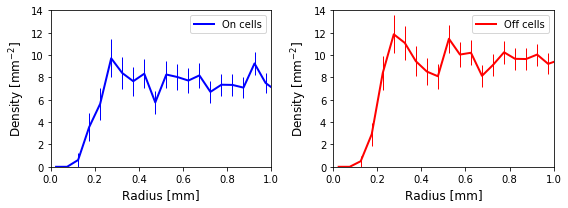

In [20]:
# Plot results for both On and Off cells, zoom in
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,3))
plot(rOn,DOn,fmts=['b-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['On cells'],
     xlim=[0,1],ylim=[0,14],axes=ax[0]);
ax[0].errorbar(rOn,DOn,EOn,fmt='none',ecolor='blue',elinewidth=1);
plot(rOf,DOf,fmts=['r-'],xlabel='Radius [mm]',ylabel='Density [mm$^{-2}$]',legend=['Off cells'],
     xlim=[0,1],ylim=[0,14],axes=ax[1]);
ax[1].errorbar(rOf,DOf,EOf,fmt='none',ecolor='red',elinewidth=1);

## Non-rectangular windows
Suppose the observation window is not rectangular, but defined by some arbitrary polygon. What is the corresponding area density function?

As argued above this is equivalent to asking for the distribution of the distance between two arbitrary points in the window. For some reason this is a popular thing to worry about among mathematicians! There exist closed-form solutions for the circle and every regular polygon (Bäsel 2012a). Perhaps interesting to us is a solution for the rectangular triangle (Bäsel 2012b).

I have looked at a purported solution for an arbitrary polygon (Pure 2019), but it doesn't seem very satisfying. It reduces the problem to a stack of hairy integrals that need to be solved numerically. Not sure this is efficient compared to just simulating the problem by drawing lots of random points in the window.

### Right triangle shape

Following Bäsel 2012b:

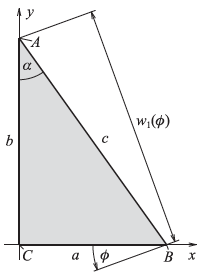

$a =$ short side

$b =$ long side

$c=\sqrt{a^2+b^2}=$ hypotenuse

$h = a \cos \alpha = $ height over hypotenuse

$u=a+b+c=$ perimeter

$\tilde A = \frac{{ab}}{2}=$ area

$\alpha = \arctan a/b =$ smaller angle

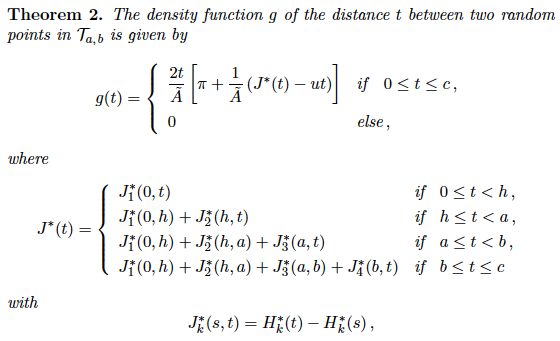

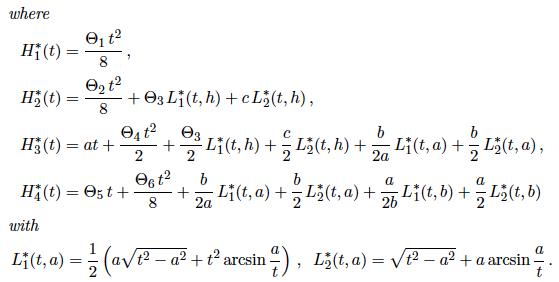

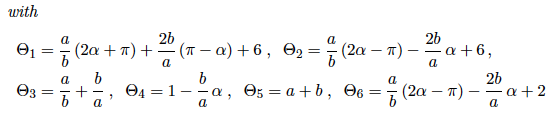

The following routine implements this calculation:

In [21]:
def Pdist_Tri(r,a,b):
    '''
    returns the distance density function for a right triangle with sides a<b
    this is the probability density of the distance between two random points in the triangle
    see Bäsel 2012, http://arxiv.org/abs/1208.6228
    '''
    def g(t):
        return 2*t/A*(np.pi+(J(t)-u*t)/A)

    def J(t):
        if t<h:
            return J1(0,t)
        elif t<a:
            return J1(0,h)+J2(h,t)
        elif t<b:
            return J1(0,h)+J2(h,a)+J3(a,t)
        else:
            return J1(0,h)+J2(h,a)+J3(a,b)+J4(b,t)

    def J1(s,t):
        return H1(t)-H1(s)

    def J2(s,t):
        return H2(t)-H2(s)

    def J3(s,t):
        return H3(t)-H3(s)

    def J4(s,t):
        return H4(t)-H4(s)

    def H1(t):
        return T1*t**2/8

    def H2(t):
        return T2*t**2/8+T3*L1(t,h)+c*L2(t,h)

    def H3(t):
        return a*t+T4*t**2/2+T3/2*L1(t,h)+c/2*L2(t,h)+b/2/a*L1(t,a)+b/2*L2(t,a)

    def H4(t):
        return T5*t+T6*t**2/8+b/2/a*L1(t,a)+b/2*L2(t,a)+a/2/b*L1(t,b)+a/2*L2(t,b)

    def L1(t,x):
        return 1/2*(x*np.sqrt(t**2-x**2)+t**2*np.arcsin(x/t))

    def L2(t,x):
        return np.sqrt(t**2-x**2)+x*np.arcsin(x/t)

    c=np.sqrt(a**2+b**2) # hypotenuse
    u=a+b+c # perimeter
    A=a*b/2 # area
    h=a*b/c # height
    al=np.arctan(a/b) # smaller angle    
    T1=a/b*(2*al+np.pi)+2*b/a*(np.pi-al)+6
    T2=a/b*(2*al-np.pi)-2*b/a*al+6
    T3=a/b+b/a
    T4=1-b/a*al
    T5=a+b
    T6=a/b*(2*al-np.pi)-2*b/a*al+2    

    return g(r)

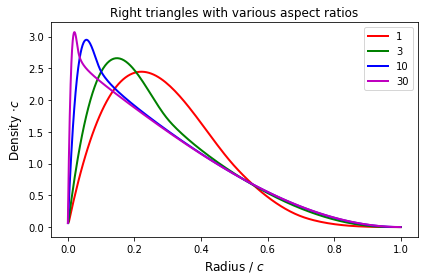

In [22]:
# plot distance density for various aspect ratios. scale x-axis / c. scale y-axis * c.
a=1 # short side
bs=[1,3,10,30]
dr=0.01
x=[]
y=[]
for b in bs:
    c=np.sqrt(a**2+b**2) # hypotenuse
    m=int(np.ceil(c/dr))
    r=dr*(0.5+np.arange(m))
    p=np.array([Pdist_Tri(x,a,b) for x in r])
    x+=[r/c]
    y+=[c*p]
plot(x,y,fmts=['r-','g-','b-','m-'],legend=bs,figsize=(6,4),
     xlabel='Radius / $c$',ylabel='Density $\cdot c$',
     title='Right triangles with various aspect ratios');

In [23]:
# simulation of points on triangle
def Sim_Tri(a,b,n,dr):
    '''
    Simulates distance density on a right triangle with dimensions a x b.
    n points uniformly distributed on the triangle
    histogram the distances at resolution dr
    overlay the analytical solution for the distance density
    '''
    x=np.random.uniform(0,a,n) # choose x from uniform distribution
    y=np.random.uniform(0,b,n) # choose y from uniform distribution 
    i=(y>b*(1-x/a)) # find points above the diagonal
    x[i]=a-x[i] # mirror those points
    y[i]=b-y[i] # mirror those points
    pts=np.stack([x,y],axis=-1) 
    r,N=Histo_Dist(pts,dr) # histogram pairwise differences
    N/=(np.sum(N)*dr) # normalize to an integral of 1
    p=np.array([Pdist_Tri(x,a,b) for x in r]) # compute analytical distribution
    plot(r,[N,p],fmts=['r-','g-'],xlabel='Radius',ylabel='Distance density',
        legend=['{} points'.format(n),'analytical'],title='Triangle with a={}, b={}'.format(a,b),
        figsize=(6,4)); # compare

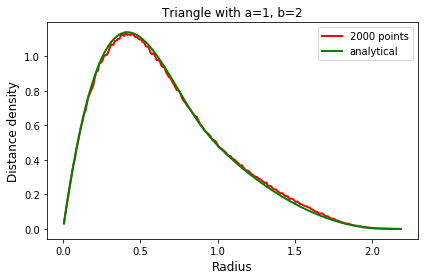

In [24]:
Sim_Tri(1,2,2000,0.01)

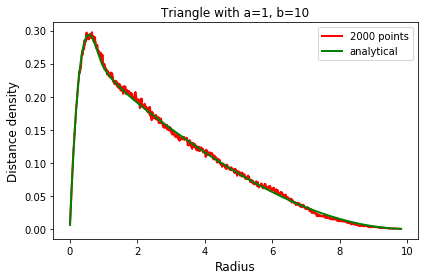

In [25]:
Sim_Tri(1,10,2000,0.01)

The formula and simulation agree pretty well!

Putting it all together, the following routine analyzes distance data on a right triangular window:

In [26]:
# Analyze pairwise distances on a rectangular window
def Analyze_Dist_Tri(pts,dr,a,b):
    '''
    Analyzes pairwise distances among the points in pts, with bin size dr,
    observed in a right triangular window of dimensions a x b, with a<b.
    '''
    r,N=Histo_Dist(pts,dr)
    A=np.array([Pdist_Tri(x,a,b) for x in r])*a*b/2
    D=N/A
    E=np.sqrt(N/(len(pts)/2)/dr)/A
    return r,D,E # radius, density, uncertainty

Let's test it with 100 points placed uniformly on the triangle

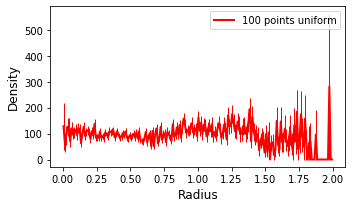

In [27]:
a=1
b=2
dr=0.01
n=100
x=np.random.uniform(0,a,n) # choose x from uniform distribution
y=np.random.uniform(0,b,n) # choose y from uniform distribution 
i=(y>b*(1-x/a)) # find points above the diagonal
x[i]=a-x[i] # mirror those points
y[i]=b-y[i] # mirror those points
pts=np.stack([x,y],axis=-1)
r,D,E=Analyze_Dist_Tri(pts,dr,a,b)
ax=plot(r,D,fmts=['r-'],xlabel='Radius',ylabel='Density',legend=['{} points uniform'.format(n)]);
ax.errorbar(r,D,E,fmt='none',ecolor='red',elinewidth=1);

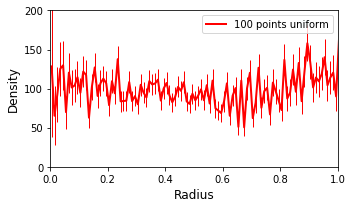

In [28]:
ax=plot(r,D,fmts=['r-'],xlabel='Radius',ylabel='Density',legend=['{} points uniform'.format(n)],
        xlim=[0,1],ylim=[0,200]);
ax.errorbar(r,D,E,fmt='none',ecolor='red',elinewidth=1);

Looks good.

### Arbitrary polygon shape
For an arbitrary polygon, the most effective way to proceed may be to estimate the distance density by simulation, just as we did above when testing the analytical formula for a right triangle. Of course that introduces some additional error because the result will not be exact. However, if you choose considerably more points for the estimation of the distance density than you have in your data set of cells, then the error will be dominated by the data, not by the normalization.

For an arbitrary polygon we can use this distance density function:

In [29]:
def Pdist_Poly(p,n,dr):
    '''
    Estimates a distance density on the polygon defined by vertices in the n x 2 array p
    uses n random points
    samples the distance density at a radius resolution of dr
    '''
    pts=Sample_Poly(p,n)
    r,N=Histo_Dist(pts,dr) # histogram pairwise differences
    N/=(np.sum(N)*dr) # normalize to an integral of 1
    return r,N

In [30]:
def PolyArea(p):
    '''
    returns the area of a polygon defined by vertices in n x 2 array p
    see "Shoelace formula"
    '''
    return 0.5*np.abs(np.dot(p[:,0],np.roll(p[:,1],1))-np.dot(p[:,1],np.roll(p[:,0],1)))

In [31]:
def Sample_Poly(p,n):
    '''
    returns n points drawn uniformly from within the polygon p
    '''
    from matplotlib import path
    pa=path.Path(p) # convert polygon to path 
    rl,rr,rb,rt=min(p[:,0]),max(p[:,0]),min(p[:,1]),max(p[:,1]) # enclosing rectangle
    w,h=rr-rl,rt-rb # width and height of enclosing rectangle
    a=PolyArea(p) # area of the polygon
    na=int((n+10*np.sqrt(n))*h*w/a) # approx number of random points needed in the enclosing rectangle
    x=np.random.uniform(low=rl,high=rr,size=na) # pick random x values
    y=np.random.uniform(low=rb,high=rt,size=na) # pick random y values
    pts=np.stack([x,y],axis=-1) # convert to n x 2 array of points
    pts=pts[pa.contains_points(pts)] # points inside polygon
    return pts[:n] # first n of these

This function analyzes the density in an arbitrary polygonal window:

In [32]:
# Analyze pairwise distances on a polygonal window
def Analyze_Dist_Poly(pts,dr,p):
    '''
    Analyzes pairwise distances among the points in pts, with bin size dr,
    observed in a window given by the polygon with vertices in p[]
    '''
    rn,N=Histo_Dist(pts,dr)
    n=1000 # number of points to estimate distance density
    ra,A=Pdist_Poly(p,n,dr)
    A*=PolyArea(p)
    m=min(len(ra),len(rn)) # truncate everything to shorter series
    r=ra[:m];N=N[:m];A=A[:m] # truncate everything to shorter series
    D=N/A
    E=np.sqrt(N/(len(pts)/2)/dr)/A
    return r,D,E # radius, density, uncertainty

Let's test this method using a house-shaped window:

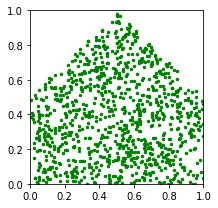

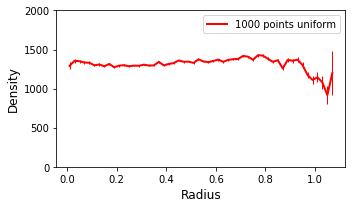

In [33]:
# test analysis with a polygonal window
p=np.array([[0,0],[0,0.5],[0.5,1],[1,0.5],[1,0],[0,0]]) # house-shaped polygon
n=1000 # number of points in window
dr=0.02 # resolution of radius
pts=Sample_Poly(p,n) # sample points on the window
plot(pts[:,0],pts[:,1],fmts=['g.'],xlim=[0,1],ylim=[0,1],equal=True);
plt.show()
r,D,E=Analyze_Dist_Poly(pts,dr,p) # analyze density
ax=plot(r,D,fmts=['r-'],xlabel='Radius',ylabel='Density',legend=['{} points uniform'.format(n)],
       ylim=[0,2000]);
ax.errorbar(r,D,E,fmt='none',ecolor='red',elinewidth=1);

Looks good!

# A model of cells on a lattice
Here we calculate through a parametric model for the cell distribution and compute the resulting DRP. The assumptions are 
- Cells are arranged on a hexagonal lattice with spacing $a$
- Each cell deviates from its lattice point by a random difference vector, distributed as a Gaussian with rms length $\sigma$.
- A random fraction $f$ of the cells are observed, for example because a genetic label is incomplete.


## Contribution from one cell
Say cell 1, the reference cell, is tethered to the origin by a random jitter vector ${\mathbf{x}}$, and cell 2 is tethered to an array position a distance $d$ from the origin by a random jitter vector ${\mathbf{y}}$.

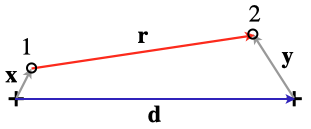

We are interested in the distance vector 

$$ {\mathbf{r}} = {\mathbf{d}} + {\mathbf{y}} - {\mathbf{x}} $$
	 
Since ${\mathbf{x}}$ and ${\mathbf{y}}$ are distributed as independent 2D gaussians each with variance $\sigma^2$, the difference vector

$$ {\mathbf{u}}={\mathbf{y}}-{\mathbf{x}} $$

follows a 2D Gaussian with variance $2\sigma^2$:

$${p_{\mathbf{u}}}\left( {\mathbf{u}} \right) = \frac{1}{{2\pi {\sigma ^2}}}\exp \left( { - \frac{{{{\mathbf{u}}^2}}}{{2{\sigma ^2}}}} \right)$$

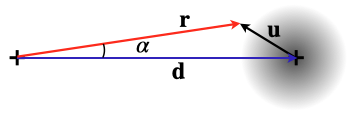

[Note the variance is $\sigma^2$ both along the $x$ and the $y$ axis, so the total variance is $2\sigma^2$.] 

So the distribution of the distance vector ${\mathbf{r}}$ is

$${p_{\mathbf{r}}}\left( {\mathbf{r}} \right) = \frac{1}{{2\pi {\sigma ^2}}}\exp \left( { - \frac{{{{\left( {{\mathbf{r}} - {\mathbf{d}}} \right)}^2}}}{{2{\sigma ^2}}}} \right) = \frac{1}{{2\pi {\sigma ^2}}}\exp \left( { - \frac{{{{\left( {{r^2} + {d^2} - 2rd\cos \alpha } \right)}^2}}}{{2{\sigma ^2}}}} \right)$$

From this we get the radial density by integrating over the azimuthal angle $\alpha$:

$$ \begin{gathered}
  {p_r}\left( r \right) = \frac{1}{{2\pi }}\int\limits_0^{2\pi } {\frac{1}{{2\pi {\sigma ^2}}}\exp \left( { - \frac{{{r^2} + {d^2} - 2rd\cos \alpha }}{{2{\sigma ^2}}}} \right)d\alpha }  \\ 
   = \frac{1}{{2\pi }}\frac{1}{{2\pi {\sigma ^2}}}\exp \left( { - \frac{{{r^2} + {d^2}}}{{2{\sigma ^2}}}} \right)\int\limits_0^{2\pi } {\exp \left( {\frac{{rd}}{{{\sigma ^2}}}\cos \alpha } \right)d\alpha }  \\ 
   = \frac{1}{{2\pi {\sigma ^2}}}\exp \left( { - \frac{{{r^2} + {d^2}}}{{2{\sigma ^2}}}} \right){I_0}\left( {\frac{{rd}}{{{\sigma ^2}}}} \right) \\ 
\end{gathered} $$

where ${I_0}\left( z \right)$ is the modified Bessel function of the first kind of order 0.

If $d$ is large compared to $\sigma$, then the density is appreciable only for $r \approx d$, the angle $\alpha$ is small, and we can ignore the curvature of the arc of radius $r$. This leads to a useful approximation:

$$ {p_r}\left( r \right) \approx \frac{1}{{2\pi r}}\frac{1}{{\sqrt {2\pi } \sigma }}\exp \left( { - \frac{{{{\left( {r - d} \right)}^2}}}{{2{\sigma ^2}}}} \right)$$


## All cells
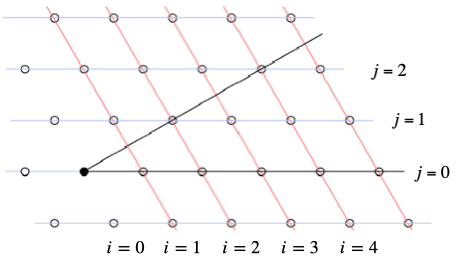
When summing over all cells, we take advantage of the symmstries of the hexagonal lattice. Effectively we have to consider only the cells in a pie slice covering 1/12 of all space. In particular the locations on and between the black lines. They can be numbered with two indices e.g. as shown. 

The distance $ d\left( {i,j} \right)$ from the origin for the location labeled $(i,j)$ is  

$$ d_{ij} = \sqrt {{i^2} + {j^2} - ij} $$

in units of the lattice spacing.

The number $n_{ij}$ of locations found at that distance is 6 for the points on the black lines and 12 for all the points in between.

Putting it all together, the average density at distance $r$ from the origin is
	 
$$ {p_r}\left( r \right) = \frac{1}{{2\pi {\sigma ^2}}}\sum\limits_{i = 0}^\infty  {\sum\limits_{j = 0}^{i/2} {{n_{ij}}\exp \left( { - \frac{{{r^2} + {d_{ij}}^2}}{{2{\sigma ^2}}}} \right){I_0}\left( {\frac{{r \cdot {d_{ij}}}}{{{\sigma ^2}}}} \right)} }  $$

In practice one can cut off the sum once the distances $d_{ij}$ exceed the region of interest. And when $d$ is much larger than $\sigma$ it may help to use the above approximation.

The following routine implements this calculation:

In [34]:
def Lattice_DRP(r,a,s,f):
    '''
    Computes DRP of hexagonal lattice with spacing a, jitter s, and fraction f.
    Returns the density at locations in array r
    '''

    def p1(r,d,s):
        '''
        contribution from one location at distance d
        r=radius
        d=distance of grid location from origin
        s=std dev of jitter
        '''
        if (r/s>20 or d/s>20):
            return 1/(2*np.pi*r)/np.sqrt(2*np.pi)/s*np.exp(-(r-d)**2/2/s**2) # approximation
        else:
            return 1/2/np.pi/s**2*np.exp(-(r**2+d**2)/2/s**2)*np.i0(r*d/s**2)

    def d(i,j):
        return np.sqrt(i**2+j**2-i*j)

    def n(i,j):
        if (j==0 or j==i/2):
            return 6
        else:
            return 12
        
    r1=r/a # distance in units of spacing a
    s1=s/a # jitter in units of spacing a
    k=int(max(r1)*2/np.sqrt(3)+10*s1) # max distance from origin
    p=np.zeros(len(r1))
    for i in range(1,k):
        for j in range(i//2+1):
            p+=[n(i,j)*p1(x,d(i,j),s1) for x in r1]
    p*=f/a**2
    return p

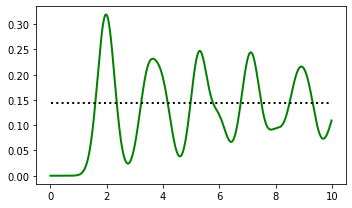

In [35]:
# test Lattice_DRP
a=2
s=0.3
f=0.5
rm=10
dr=0.01
r=dr*(0.5+np.arange(rm//dr))
p=Lattice_DRP(r,a,s,f)
ax=plot(r,p,fmts=['g-']);
plot([r[0],r[-1]],[2/np.sqrt(3)*f/a**2,2/np.sqrt(3)*f/a**2],fmts=['k:'],axes=ax); # mean density

## Simulation of cells on a jittered lattice

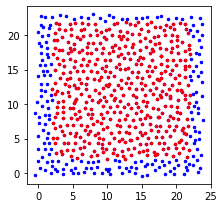

In [36]:
# simulate lattice of 20 x 20 locations
    # lattice parameters
a=1.0 # spacing
s=0.3 # jitter
f=1.0 # fraction labeled
    # simulation choices
dr=0.1 # resolution on radius
w=20 # window width
h=20 # window height

nx=w+4 # number of columns, start with 4 extra rows & columns, then crop
ny=int((h+4)*2/np.sqrt(3)) # number of rows
ctr=np.array([[(i%nx+((i//nx)%2)*0.5)*a,(i//nx)*np.sqrt(3)/2*a] for i in range(nx*ny)]) # centers
pts=ctr+np.random.normal(size=ctr.shape)*s/np.sqrt(2) # add jitter
p=np.array([[2,2],[2+w,2],[2+w,2+h],[2,2+h],[2,2]])*a # crop these to a square window h x w 
pa=path.Path(p) # convert polygon to path 
pts2=pts[pa.contains_points(pts)] # points inside window
ax=plot(pts[:,0],pts[:,1],fmts=['b.'],equal=True);
plot(pts2[:,0],pts2[:,1],fmts=['r.'],axes=ax);

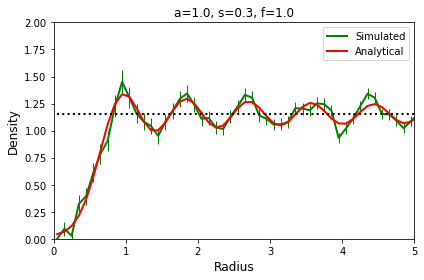

In [37]:
# compute and model the DRP
r,D,E=Analyze_Dist(pts2,dr,w,h)
p=Lattice_DRP(r,a,s,f)
ax=plot(r,[D,p],xlim=[0,5],ylim=[0,2],fmts=['g-','r-'],figsize=(6,4),
       xlabel='Radius',ylabel='Density',legend=['Simulated','Analytical'],
       title='a={}, s={}, f={}'.format(a,s,f));
ax.errorbar(r,D,E,fmt='none',ecolor='green',elinewidth=1);
plot([r[0],r[-1]],[2/np.sqrt(3)*f/a**2,2/np.sqrt(3)*f/a**2],fmts=['k:'],axes=ax); # mean density

Pretty nice correspondence!

# References
1. Bäsel U. Random chords and point distances in regular polygons. arXiv:12042707 [math]. 2012a [cited 27 Dec 2020]. Available: http://arxiv.org/abs/1204.2707
2. Bäsel U. The distribution function of the distance between two random points in a right-angled triangle. arXiv:12086228 [math]. 2012b [cited 27 Dec 2020]. Available: http://arxiv.org/abs/1208.6228
1. Kram YA, Mantey S, Corbo JC. Avian Cone Photoreceptors Tile the Retina as Five Independent, Self-Organizing Mosaics. PLOS ONE. 2010;5: e8992. doi:10.1371/journal.pone.0008992
1. Pure R, Durrani S, Tong F, Pan J. Distance Distribution Between Two Random Nodes in Arbitrary Polygons. arXiv:190307757 [cs, math]. 2019 [cited 27 Dec 2020]. Available: http://arxiv.org/abs/1903.07757
1. Rodieck RW. The density recovery profile: a method for the analysis of points in the plane applicable to retinal studies. Vis Neurosci. 1991;6: 95–111. 
1. Roska M, Meister M. The Retina Dissects the Visual Scene into Distinct Features. In: Werner JS, Chalupa LM, editors. The New Visual Neurosciences. Cambridge, MA: MIT Press; 2014. pp. 163–182. 
1. Wässle H, Peichl L, Boycott BB. Morphology and topography of on- and off-alpha cells in the cat retina. Proc R Soc Lond B Biol Sci. 1981;212: 157–75. 
2. Zhang Y, Kim IJ, Sanes JR, Meister M. The most numerous ganglion cell type of the mouse retina is a selective feature detector. Proc Natl Acad Sci U S A. 2012;109: E2391-8. doi:10.1073/pnas.1211547109
